In [1]:
%matplotlib inline


# Regularized OT with generic solver


Illustrates the use of the generic solver for regularized OT with
user-designed regularization term. It uses Conditional gradient as in [6] and
generalized Conditional Gradient as proposed in [5][7].


[5] N. Courty; R. Flamary; D. Tuia; A. Rakotomamonjy, Optimal Transport for
Domain Adaptation, in IEEE Transactions on Pattern Analysis and Machine
Intelligence , vol.PP, no.99, pp.1-1.

[6] Ferradans, S., Papadakis, N., Peyré, G., & Aujol, J. F. (2014).
Regularized discrete optimal transport. SIAM Journal on Imaging Sciences,
7(3), 1853-1882.

[7] Rakotomamonjy, A., Flamary, R., & Courty, N. (2015). Generalized
conditional gradient: analysis of convergence and applications.
arXiv preprint arXiv:1510.06567.






In [2]:
import numpy as np
import matplotlib.pylab as pl
import ot
import ot.plot

Generate data
-------------



In [3]:
n = 100  # nb bins

# bin positions
x = np.arange(n, dtype=np.float64)

# Gaussian distributions
a = ot.datasets.make_1D_gauss(n, m=20, s=5)  # m= mean, s= std
b = ot.datasets.make_1D_gauss(n, m=60, s=10)

# loss matrix
M = ot.dist(x.reshape((n, 1)), x.reshape((n, 1)))
M /= M.max()

Solve EMD
---------



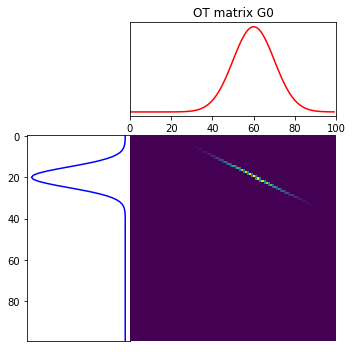

In [4]:
G0 = ot.emd(a, b, M)

pl.figure(3, figsize=(5, 5))
ot.plot.plot1D_mat(a, b, G0, 'OT matrix G0')

Solve EMD with Frobenius norm regularization
--------------------------------------------



It.  |Loss        |Relative loss|Absolute loss
------------------------------------------------
    0|1.760578e-01|0.000000e+00|0.000000e+00
    1|1.669467e-01|5.457501e-02|9.111116e-03
    2|1.665639e-01|2.298130e-03|3.827855e-04
    3|1.664378e-01|7.572776e-04|1.260396e-04
    4|1.664077e-01|1.811855e-04|3.015066e-05
    5|1.663912e-01|9.936787e-05|1.653393e-05
    6|1.663852e-01|3.555826e-05|5.916369e-06
    7|1.663814e-01|2.305693e-05|3.836245e-06
    8|1.663785e-01|1.760450e-05|2.929009e-06
    9|1.663767e-01|1.078011e-05|1.793559e-06
   10|1.663751e-01|9.525192e-06|1.584755e-06
   11|1.663737e-01|8.396466e-06|1.396951e-06
   12|1.663727e-01|6.086938e-06|1.012700e-06
   13|1.663720e-01|4.042609e-06|6.725769e-07
   14|1.663713e-01|4.160914e-06|6.922568e-07
   15|1.663707e-01|3.823502e-06|6.361187e-07
   16|1.663702e-01|3.022440e-06|5.028438e-07
   17|1.663697e-01|3.181249e-06|5.292634e-07
   18|1.663692e-01|2.698532e-06|4.489527e-07
   19|1.663687e-01|3.258253e-06|5.420712e-07
It. 

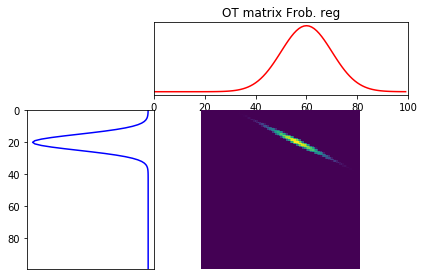

In [5]:
def f(G):
    return 0.5 * np.sum(G**2)


def df(G):
    return G


reg = 1e-1

Gl2 = ot.optim.cg(a, b, M, reg, f, df, verbose=True)

pl.figure(3)
ot.plot.plot1D_mat(a, b, Gl2, 'OT matrix Frob. reg')

Solve EMD with entropic regularization
--------------------------------------



It.  |Loss        |Relative loss|Absolute loss
------------------------------------------------
    0|1.692289e-01|0.000000e+00|0.000000e+00
    1|1.617643e-01|4.614437e-02|7.464513e-03
    2|1.612639e-01|3.102965e-03|5.003963e-04
    3|1.611291e-01|8.371098e-04|1.348827e-04
    4|1.610468e-01|5.110558e-04|8.230389e-05
    5|1.610198e-01|1.672927e-04|2.693743e-05
    6|1.610130e-01|4.232417e-05|6.814742e-06
    7|1.610090e-01|2.513455e-05|4.046887e-06
    8|1.610002e-01|5.443507e-05|8.764057e-06
    9|1.609996e-01|3.657071e-06|5.887869e-07
   10|1.609948e-01|2.998735e-05|4.827807e-06
   11|1.609695e-01|1.569217e-04|2.525962e-05
   12|1.609533e-01|1.010779e-04|1.626881e-05
   13|1.609520e-01|8.043897e-06|1.294681e-06
   14|1.609465e-01|3.415246e-05|5.496718e-06
   15|1.609386e-01|4.898605e-05|7.883745e-06
   16|1.609324e-01|3.837052e-05|6.175060e-06
   17|1.609298e-01|1.617826e-05|2.603564e-06
   18|1.609184e-01|7.080015e-05|1.139305e-05
   19|1.609083e-01|6.273206e-05|1.009411e-05
It. 

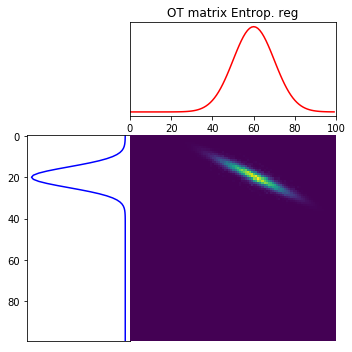

In [6]:
def f(G):
    return np.sum(G * np.log(G))


def df(G):
    return np.log(G) + 1.


reg = 1e-3

Ge = ot.optim.cg(a, b, M, reg, f, df, verbose=True)

pl.figure(4, figsize=(5, 5))
ot.plot.plot1D_mat(a, b, Ge, 'OT matrix Entrop. reg')

Solve EMD with Frobenius norm + entropic regularization
-------------------------------------------------------



It.  |Loss        |Relative loss|Absolute loss
------------------------------------------------
    0|1.693084e-01|0.000000e+00|0.000000e+00
    1|1.610202e-01|5.147342e-02|8.288260e-03
    2|1.609508e-01|4.309685e-04|6.936474e-05
    3|1.609484e-01|1.524885e-05|2.454278e-06
    4|1.609477e-01|3.863641e-06|6.218444e-07
    5|1.609475e-01|1.433633e-06|2.307397e-07
    6|1.609474e-01|6.332412e-07|1.019185e-07
    7|1.609474e-01|2.950826e-07|4.749276e-08
    8|1.609473e-01|1.508393e-07|2.427718e-08
    9|1.609473e-01|7.859971e-08|1.265041e-08
   10|1.609473e-01|4.337432e-08|6.980981e-09


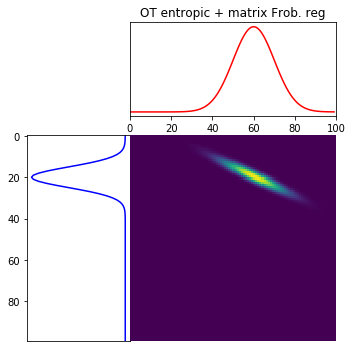

In [7]:
def f(G):
    return 0.5 * np.sum(G**2)


def df(G):
    return G


reg1 = 1e-3
reg2 = 1e-1

Gel2 = ot.optim.gcg(a, b, M, reg1, reg2, f, df, verbose=True)

pl.figure(5, figsize=(5, 5))
ot.plot.plot1D_mat(a, b, Gel2, 'OT entropic + matrix Frob. reg')
pl.show()